In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [5]:
df = pd.read_csv("data/telco.csv")

In [6]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for col in df.columns:
    print(col)
    
print(f"Columns are:{df.shape[1]}") #Columns
print(f"Rows are:{df.shape[0]}") #Rows

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
Columns are:21
Rows are:7043


### Identification Of Missing Values

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# totalcharges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

df.dropna(inplace=True) #Total Charges 11 misiiing values which is of no need
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking For Unique Values 
As shown below, some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [10]:
df.drop(columns='customerID', inplace=True)

In [11]:

# unique elements of the PaymentMethod column
df.PaymentMethod.unique()
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
# unique elements of the PaymentMethod column after the modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [12]:
df.nunique() #Checking for unique values

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### Indentifying Types Of Features In Dataset

### There are 17 categorical features:

- CustomerID: Customer ID unique for each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependent: Whether the customer has dependents or not (Yes, No)
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
Next, there are 3 numerical features:

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Finally, there’s a prediction feature:

Churn: Whether the customer churned or not (Yes or No)

### Distrubution Of Target Variable

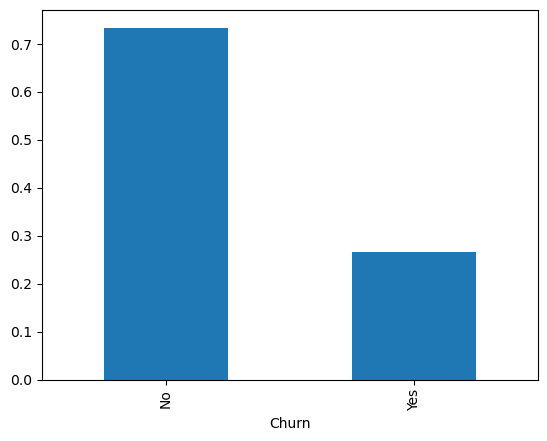

In [13]:
#distruibution of the target variable
df.Churn.value_counts(normalize=True).plot(kind='bar')
plt.show()

- Here we can identify that the dataset is imbalanced w.r.t target variable(NO)
- It's a Binary Classification with imbalanced dataset

## Checking  statistics 

In [14]:
df.describe() #Descriptive statistics() 3 Numeric Variables

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##### Insights
- SeniorCitizen is actually a categorical variable hence the 25%-50%-75% distribution is not proper.
- 75% of customers have a tenure of fewer than 55 months. 
- Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month.

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate Analysis 

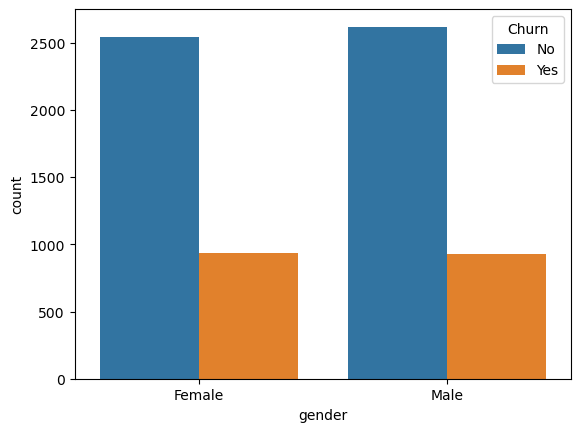

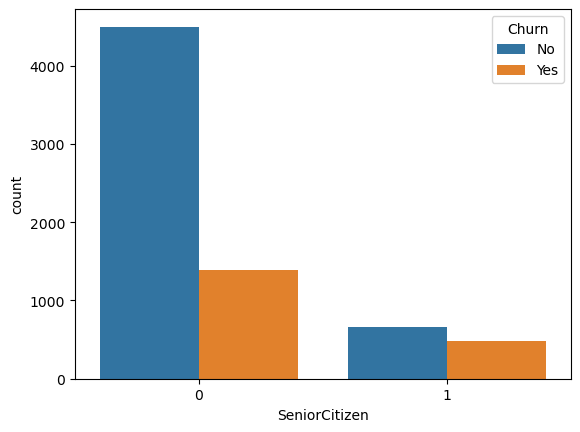

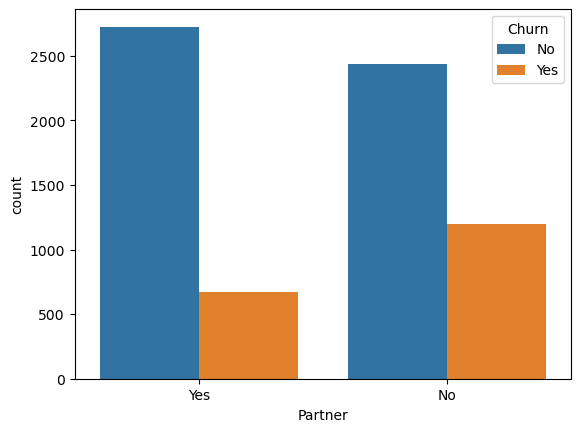

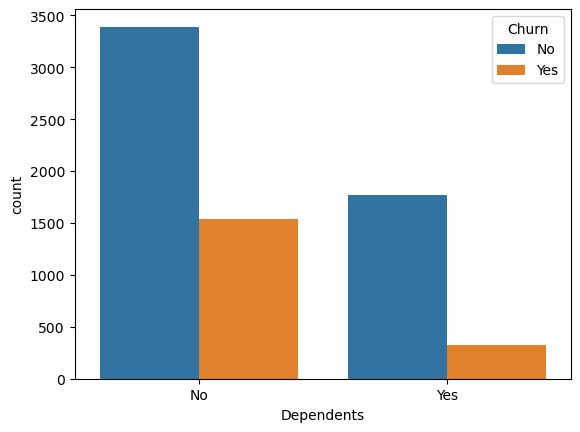

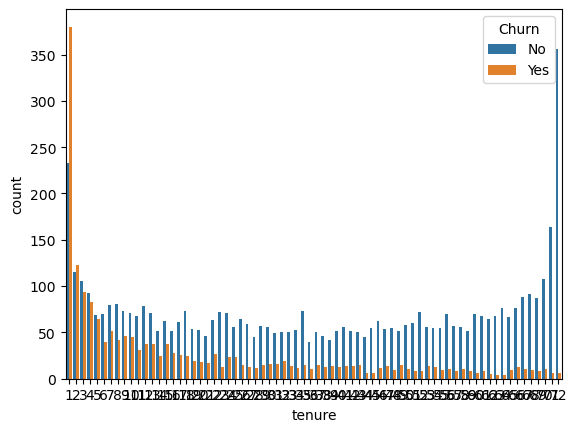

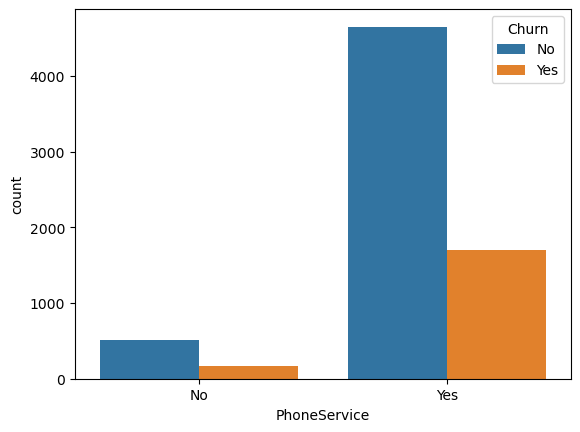

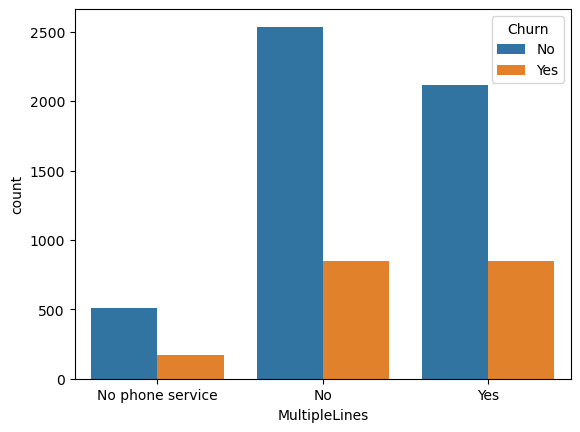

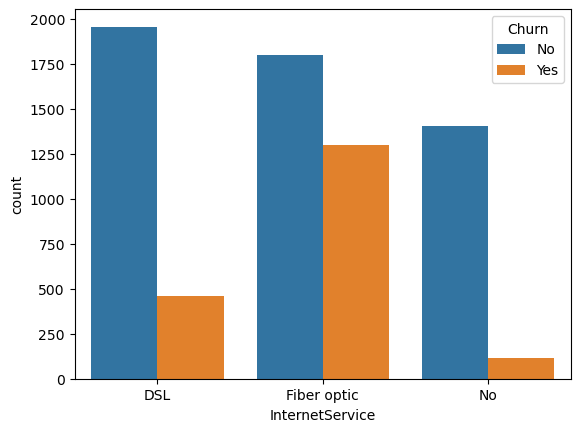

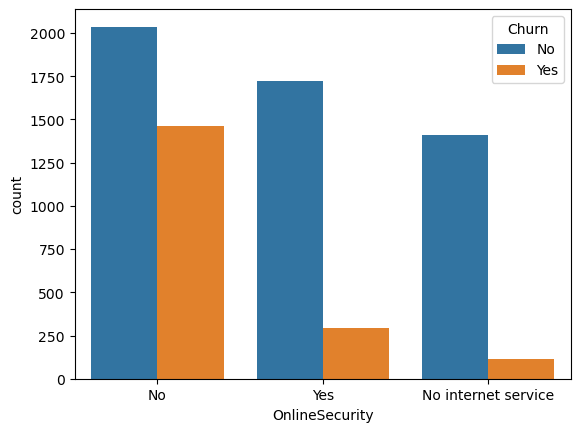

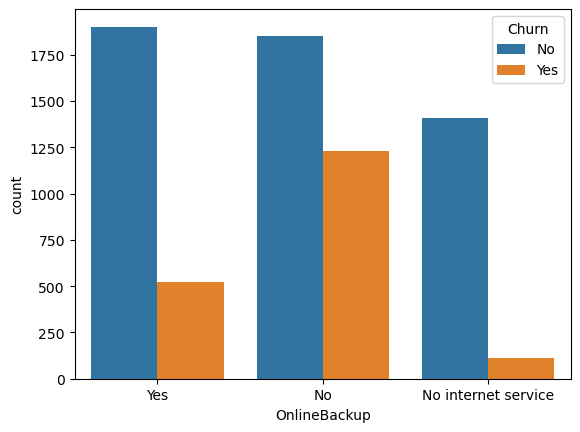

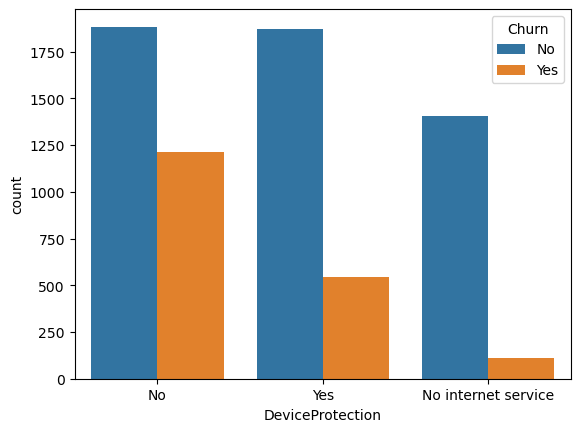

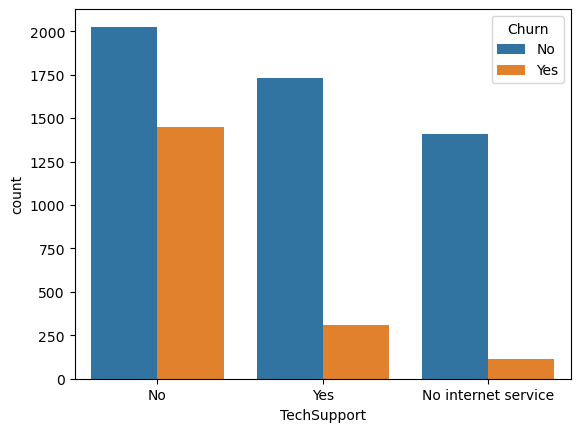

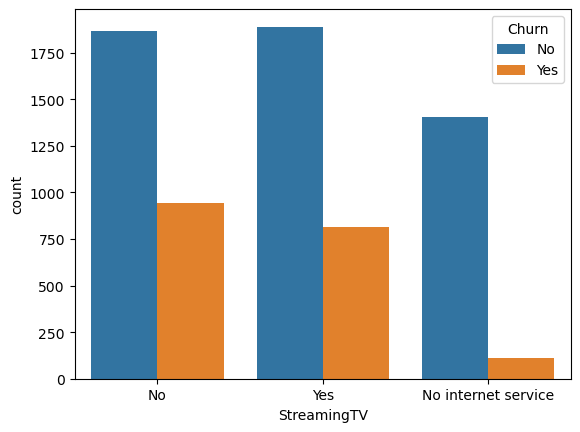

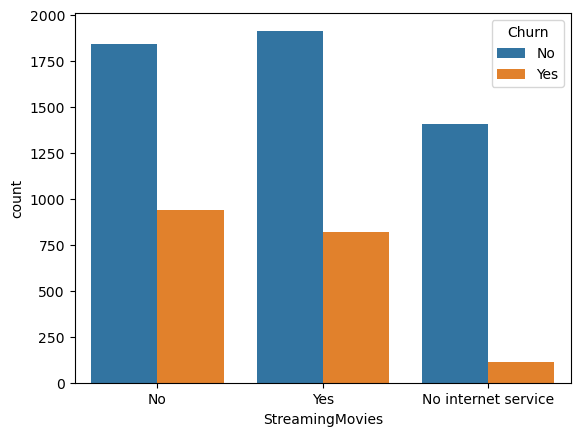

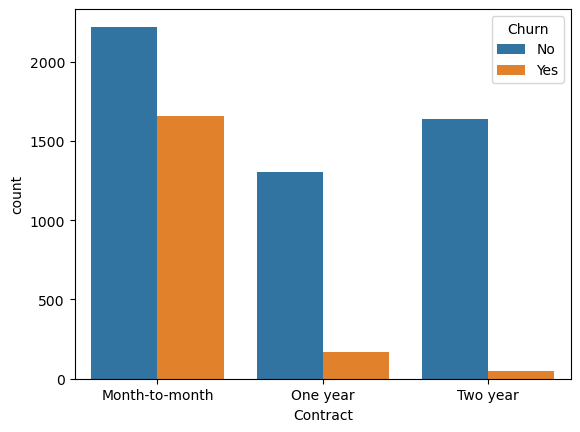

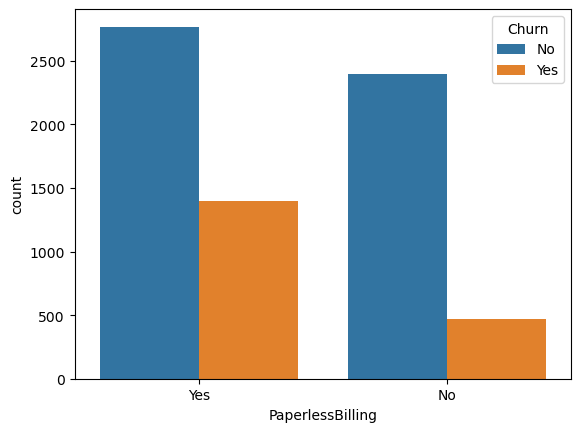

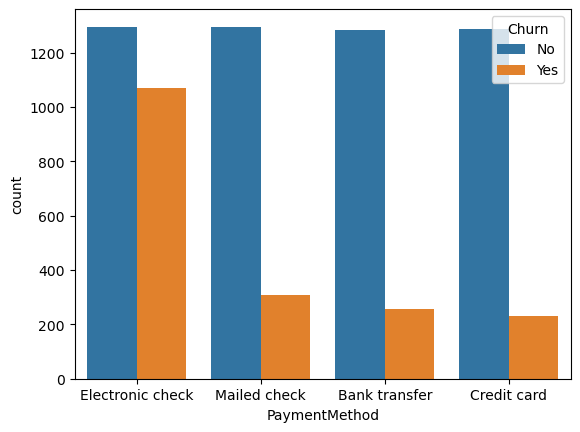

In [16]:
for i , predictor  in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='Churn')

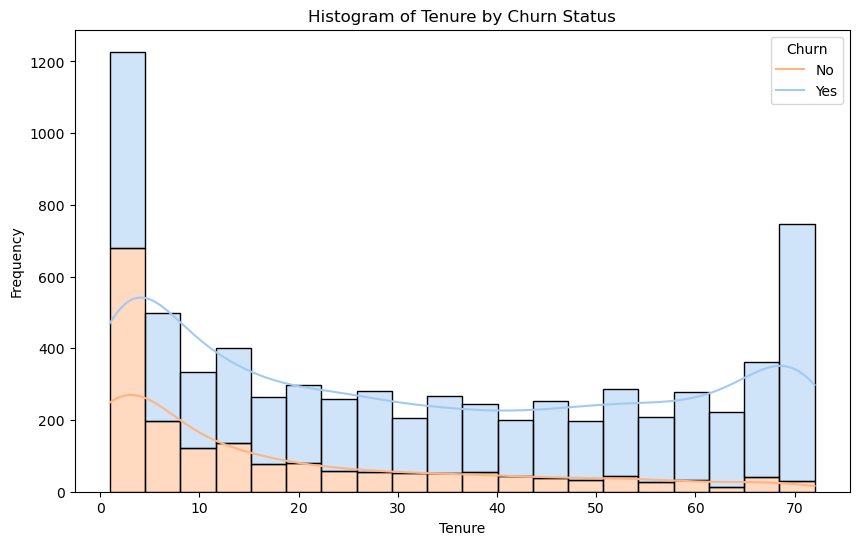

In [17]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'tenure' and 'churn' are your features
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', bins=20, kde=True, hue='Churn', multiple='stack', palette='pastel')
plt.title('Histogram of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

### Insights
-  we have churn rate by gender in which we have analysed that churn rate is almost 50-50 
-  senior citizen are less likely to churn 
-  Customers without partners are churning more as compared to with partners
- customers with no tech support likely to churn more and customers with NO Net are least to churn
-  Customers who use Paperless Billing are churning more in comparison to their counterparts.
-  Tenure groups of 1-12 and 13–24 are churning more which can be intuitively understood from the fact that teens and early 20s customers are changing their telecom services more frequently and thus are not so loyal customers in comparison to their parents or grandparents

In [18]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### Regression Plot(Charges)

e:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


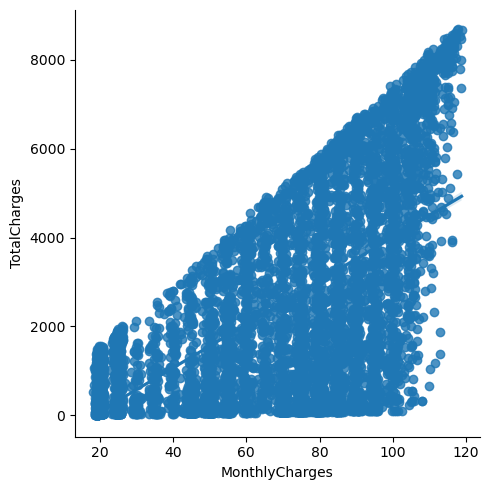

In [19]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=True)

Inference: Here from the above graph it is clear that as the monthly charges are increasing we can experience the total charges also increase which shows the positive correlation too

#### Measure the churn by charges

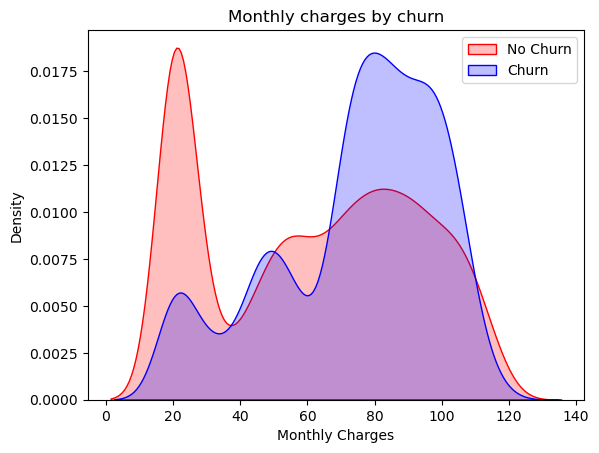

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [20]:
df_dummies = pd.get_dummies(df)

mth = sns.kdeplot(df_dummies.MonthlyCharges[(df["Churn"] == 0) ], color="Red", fill = True)
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df["Churn"] == 1) ], ax =mth, color="Blue", fill = True)
mth.legend(["No Churn","Churn"],loc = 'upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by churn')
plt.show()
df_dummies

Insight: Here it is evident that when the churn is high then the charges are high.

Text(0.5, 1.0, 'Total charges by churn')

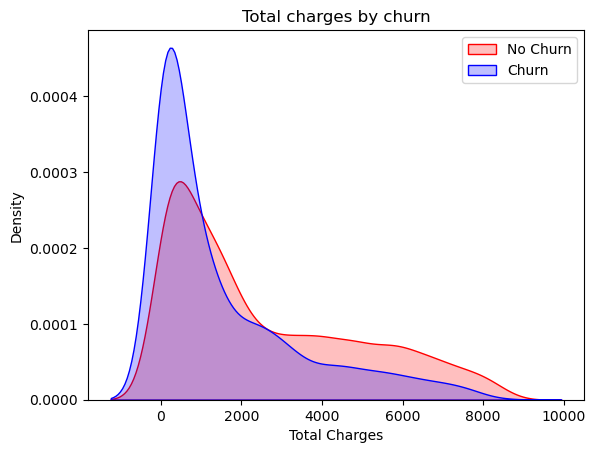

In [21]:
mth = sns.kdeplot(df_dummies.TotalCharges[(df["Churn"] == 0) ], color="Red", fill = True)
mth = sns.kdeplot(df_dummies.TotalCharges[(df["Churn"] == 1) ], ax =mth, color="Blue", fill = True)
mth.legend(["No Churn","Churn"],loc = 'upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Total Charges')
mth.set_title('Total charges by churn')


Inference: Here we get the surprising insight that as we can see more churn is there with lower charges.

Higher Monthly Charge,Lower Tenure,Lower Total charge == Highest Churn

### HeatMap Analysis

<Axes: >

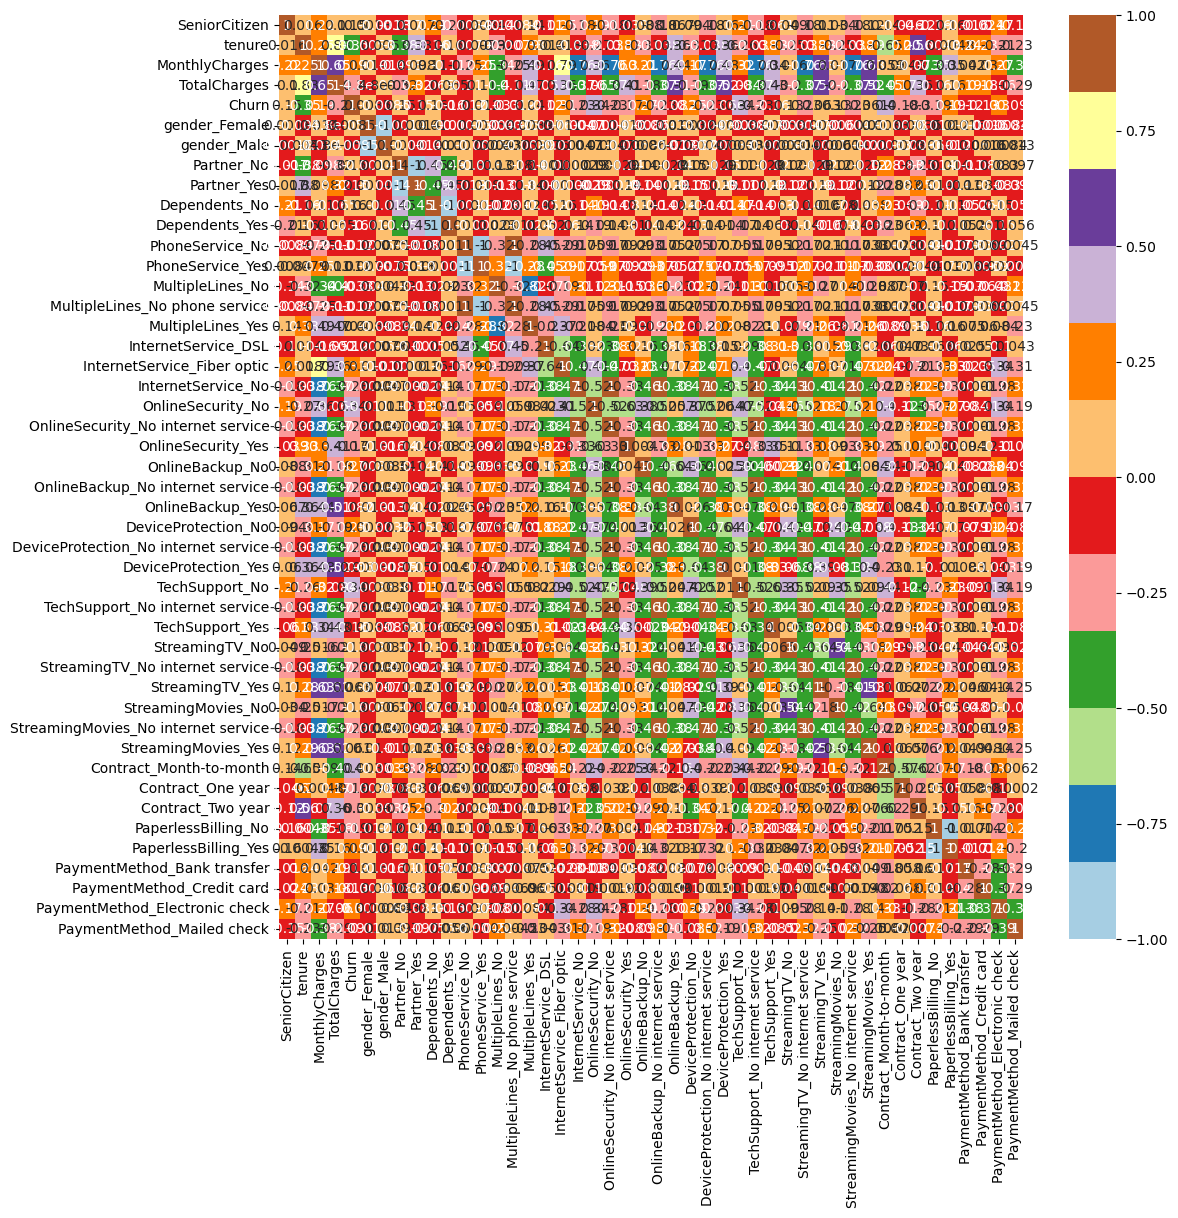

In [22]:
#get dummies
data_dummies = pd.get_dummies(df)
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired", annot=True)

In [23]:
# Checking for outliers in the continuous variables
num_telecom = df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99]) #no Outliers

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


In [24]:
from sklearn.metrics import mutual_info_score
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)
categorical_variables = df.select_dtypes(include=object)

categorical_var = df.select_dtypes(include='object')
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

In [25]:
df.drop(columns=['gender','PhoneService','MultipleLines'], inplace=True)

###  Feature Engineering

1. Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn 

In [26]:
df_transformed= df.copy()

# label encoding (binary variables)
label_encoding_columns = [ 'Partner','Dependents', 'PaperlessBilling']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})
df_transformed

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0
7040,0,1,1,11,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [27]:

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [28]:
df_transformed

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,0,56.95,1889.50,0,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,True,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,True,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,151.65,1,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,True,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,103.20,7362.90,0,False,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,1,29.60,346.45,0,True,False,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,74.40,306.60,1,False,True,...,True,False,False,True,False,False,False,False,False,True


In [29]:
from sklearn.preprocessing import MinMaxScaler
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_transformed, columns=features_mms)
df_remaining = df_transformed.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)
df

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0,1,0,1,0,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0.464789,0.385075,0.215867,0,0,0,0,0,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0.014085,0.354229,0.010310,0,0,0,1,1,True,False,...,True,False,False,True,False,False,False,False,False,True
3,0.619718,0.239303,0.210241,0,0,0,0,0,True,False,...,True,False,False,False,True,False,True,False,False,False
4,0.014085,0.521891,0.015330,0,0,0,1,1,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.323944,0.662189,0.227521,0,1,1,1,0,True,False,...,False,False,True,False,True,False,False,False,False,True
7039,1.000000,0.845274,0.847461,0,1,1,1,0,False,True,...,False,False,True,False,True,False,False,True,False,False
7040,0.140845,0.112935,0.037809,0,1,1,1,0,True,False,...,True,False,False,True,False,False,False,False,True,False
7041,0.042254,0.558706,0.033210,1,1,0,1,1,False,True,...,True,False,False,True,False,False,False,False,False,True


In [30]:
df_transformed

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,0,56.95,1889.50,0,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,True,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,True,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,151.65,1,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,True,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,103.20,7362.90,0,False,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,1,29.60,346.45,0,True,False,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,74.40,306.60,1,False,True,...,True,False,False,True,False,False,False,False,False,True


###Corelation Analysis

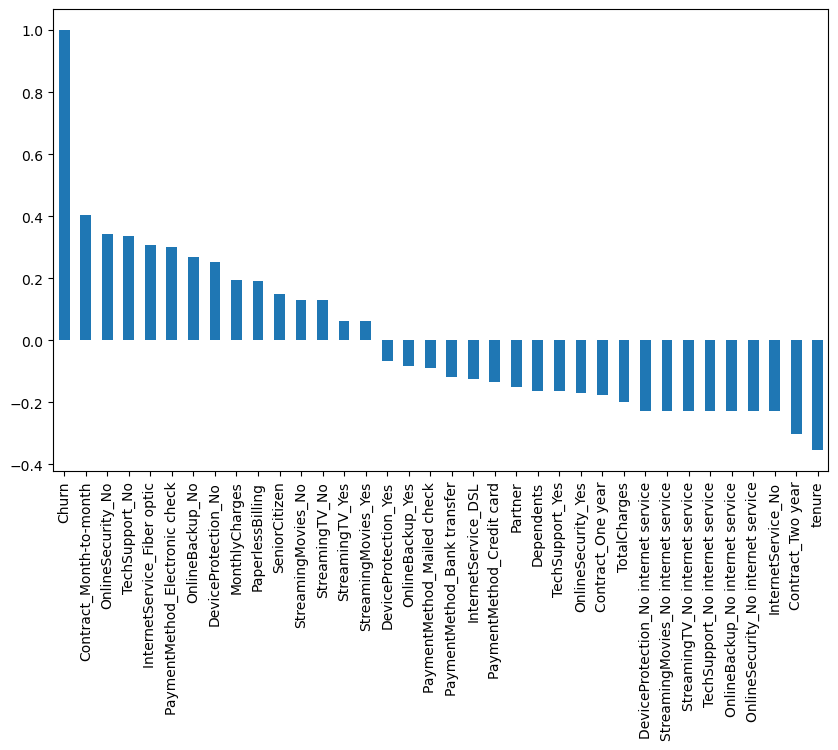

In [31]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

In [32]:
df_transformed

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,0,56.95,1889.50,0,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,True,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,True,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,151.65,1,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,True,False,...,False,False,True,False,True,False,False,False,False,True
7039,0,1,1,72,1,103.20,7362.90,0,False,True,...,False,False,True,False,True,False,False,True,False,False
7040,0,1,1,11,1,29.60,346.45,0,True,False,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,0,4,1,74.40,306.60,1,False,True,...,True,False,False,True,False,False,False,False,False,True


In [33]:
from sklearn.preprocessing import StandardScaler

x = df_transformed.drop(columns='Churn')
y = df_transformed['Churn']

scaler = StandardScaler()
x1 = scaler.fit_transform(x)
x1

array([[-0.44032709,  1.03561683, -0.65230493, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709,  1.03561683,  1.53302536, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902,  1.03561683, -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [34]:
#hadnling imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_resample, y_resample = smote.fit_resample(x1, y)
y_resample.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [35]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=42,stratify=y_resample)

In [36]:
#model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    
]

for model_name, model in models:
    model.fit(x_train, y_train)
    print(f"{model_name} trained.")
    
    y_pred = model.predict(x_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    
    f1_score_value = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1_score_value}")

Logistic Regression trained.
Accuracy: 0.7633107454017425
F1 Score: 0.7776261937244202
Decision Tree trained.
Accuracy: 0.7754114230396902
F1 Score: 0.7792578496669837
Random Forest trained.
Accuracy: 0.856243949661181
F1 Score: 0.8597071327350023


Gradient Boosting trained.
Accuracy: 0.824298160696999
F1 Score: 0.8344733242134063


In [37]:
model.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

In [40]:
from sklearn.ensemble import RandomForestClassifier
params_grid = {
    'n_estimators': [100, 200, 100],
    'max_depth': [None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, param_grid=params_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_


KeyboardInterrupt: 